# SMAI Assignment - 2

## Question - `2` : Face Recognition using Principal Component Analysis

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


#### Import Libraries

In [25]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
       

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [42]:
class Load_dataset:
            
    def __init__(self,num_of_img_req_to_train):
            dir = ("ATnT")
            self.train_img_path = []
            self.train_label = []
            self.n_data_sets_to_train =[]
            self.target_name_as_array= []
            self.target_name_as_array= []
            self.target_name_as_set = {}
            self.test_img_path = []
            self.test_label = []
            self.n_data_sets_to_test =[]
            
            k = 0
            nth_set = 0
            for dir_start_with_s in os.listdir(dir):
                dir_path = os.path.join(dir,dir_start_with_s)
                
                if os.path.isdir(dir_path):## if a folder
                    if len(os.listdir(dir_path)) >= num_of_img_req_to_train:
                        cnt = 0
                        for image_name in os.listdir(dir_path):
                            img_path = os.path.join(dir_path,image_name)
                            
                            if image_name.endswith('.pgm'): 
                                                                                    
                                if cnt < num_of_img_req_to_train:
                                    self.train_img_path.append(img_path) 
                                    self.train_label.append(nth_set+1)
                                    if len(self.n_data_sets_to_train) > nth_set:
                                        self.n_data_sets_to_train[nth_set] += 1
                                    else:
                                        self.n_data_sets_to_train.append(1)

                                    if cnt == 0:
                                        self.target_name_as_array.append(dir_start_with_s)
                                        self.target_name_as_set[nth_set] = dir_start_with_s

                                else:
                                    self.test_img_path.append(img_path) 
                                    self.test_label.append(nth_set+1)                                
                                    if len(self.n_data_sets_to_test) > nth_set:
                                        self.n_data_sets_to_test[nth_set] += 1
                                    else:
                                        self.n_data_sets_to_test.append(1)                                
                            cnt+=1
                    nth_set += 1
                    
                
            

In [27]:

class images_to_matrix_class:

    def __init__(self, images_list, img_width, img_height):

        self.images_list = images_list
        self.img_width = img_width
        self.img_height = img_height
        self.img_size = (img_width * img_height)

    def get_matrix(self):

        n_imgs = len(self.images_list)
        img_mat = np.zeros((self.img_size, n_imgs))
        #for n imahges it contains a list n_imgs-vectro of size= img_size
        '''
        img_mat is initialized as a numpy array of zeros. 
        The dimensions of this array are (self.img_size, n_imgs), 
        where self.img_size is the size of 
        each flattened image and 
        n_imgs is the number of images in the images_name list. 
        '''
        i = 0
        for img_name in self.images_list:
            gray = cv2.imread(img_name, 0)
            #read imag in gray mode 
            # resize this imagae to particular size
            gray = cv2.resize(gray, (self.img_height, self.img_width))
            #convert to matrix
            matrix_gray = np.asmatrix(gray)
            
            img_mat[:, i] = matrix_gray.ravel()
            # add entry column wise
            i += 1
        return img_mat

In [43]:
 #No of images For Training(Left will be used as testing Image)
num_of_img_req_to_train = 8
data_obj = Load_dataset(num_of_img_req_to_train)

In [ ]:
 #Data For Training
train_img_set = data_obj.train_img_path
y_train = data_obj.train_label
n_data_sets_to_train = data_obj.n_data_sets_to_train
target_names = data_obj.target_name_as_array

#Data For Testing
test_img_set = data_obj.test_img_path
y_test = data_obj.test_label
n_data_sets_to_test = data_obj.n_data_sets_to_test
 
img_width, img_height = 92, 112
 
img_height

112

In [30]:
# print(train_img_set)
# print(y_train)
print(len(n_data_sets_to_train))

40


In [31]:
imag_to_matrix = images_to_matrix_class(train_img_set,img_width,img_height)

flatten_face = imag_to_matrix.get_matrix()

X_flat = np.asarray(flatten_face)
X_flat = X_flat.T

In [32]:
X_flat.shape

(320, 10304)

#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [33]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""
from scipy.linalg import eigh 
def principalComponentAnalysis(X, n_components):
  #colmn standardization
  X = X - np.mean(X,axis=0)
  #1. finding covarieance: S= X^T . X
  S = np.matmul(X.T,X)
  
  #2. compute top two eigen vector on basis of top eigen values
  #eigh give eigen values in ascending order so require last n components
  eig_val, eig_vec = eigh(S, eigvals=(X.shape[1]-n_components, X.shape[1]-1))

  
  #3.to do this, we first need to find the projection_matrix 
  #(which you implemented earlier)
  #which projects our input data onto the vector space spanned 
  #by the eigenvectors
  eig_vec = eig_vec.T
  return  eig_vec
  #2. find 

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [34]:
eigenfaces = principalComponentAnalysis(X_flat, 5)
eigenfaces

C:\Users\Lokes\AppData\Local\Temp\ipykernel_7736\1313223351.py:16: DeprecationWarning: Keyword argument 'eigvals' is deprecated in favour of 'subset_by_index' keyword instead and will be removed in SciPy 1.12.0.
  eig_val, eig_vec = eigh(S, eigvals=(X.shape[1]-n_components, X.shape[1]-1))


array([[-0.00112932, -0.00114243, -0.00117891, ..., -0.00231086,
        -0.00269192, -0.00274544],
       [-0.00940473, -0.00935179, -0.00946422, ...,  0.01685556,
         0.01648351,  0.01624139],
       [-0.02109936, -0.02113972, -0.02101965, ..., -0.0120734 ,
        -0.01222882, -0.01251253],
       [-0.01437058, -0.01434321, -0.01432086, ...,  0.01061959,
         0.00988126,  0.00936353],
       [-0.00290656, -0.00286325, -0.00291015, ..., -0.00607719,
        -0.00602211, -0.00668009]])

In [35]:
# Function to implement image reconstruction by taking arguements as necessary.
def imageReconstruction(X_flat,eigenfaces):
  ##x_flat face matrix
  weights = eigenfaces @ (X_flat - np.mean(X_flat,axis=0)).T
  

  a=np.dot(weights.T,eigenfaces)+np.mean(X_flat,axis=0)
  

  return a

In [36]:
d = imageReconstruction(X_flat , eigenfaces)

In [46]:
d = d.reshape(40,8,112,92)

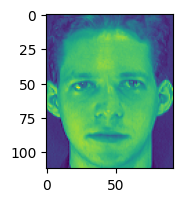

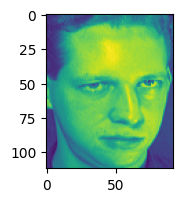

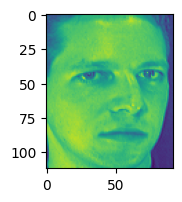

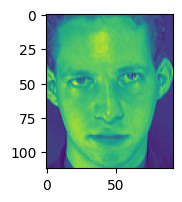

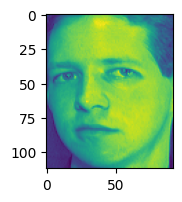

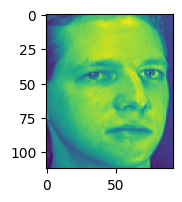

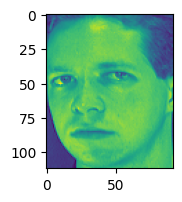

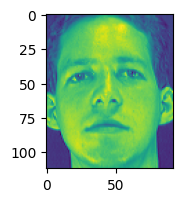

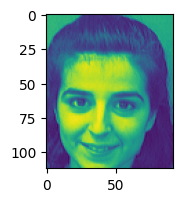

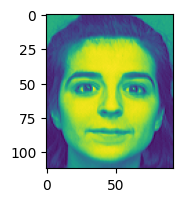

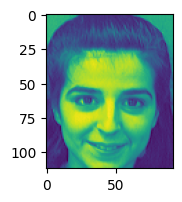

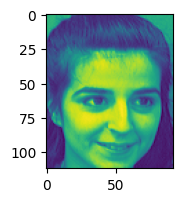

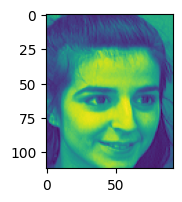

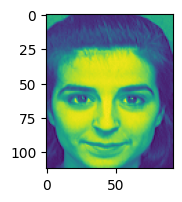

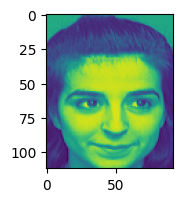

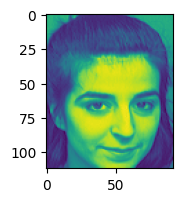

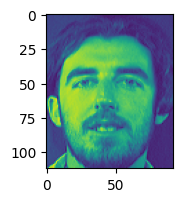

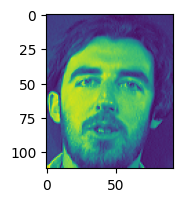

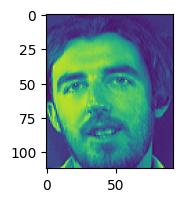

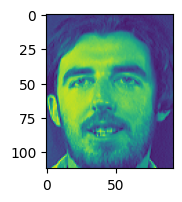

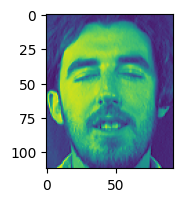

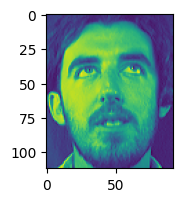

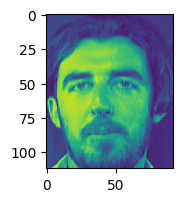

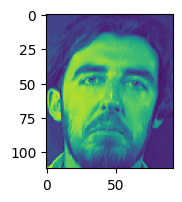

In [67]:
from PIL import Image

i=0
for img_path in train_img_set:
    img = Image.open(img_path)
    plt.show()
    plt.figure(figsize = (10,2))
    plt.imshow(img)
    i=i+1
    if i >=24 :
        break
    
 
 

In [71]:
faceshape

'ATnT\\s1\\1.pgm'

In [74]:
faceshape = train_img_set[0]
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
print("Showing the eigenfaces")
plt.show()
plt.imshow(d[5][5])

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [ ]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
def model():

  return

In [ ]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""

'\nIterate through all the images in the test data and \ntest the accurate by taking different number of components\n'

In [ ]:
# Plot Number of eigenvectors vs Mean Square Error

In [ ]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error

Summarise your observations on the plots and accuracies

**Answer:**

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:**